# 📌 Logistic Regression 

## 🟢 Introduction

- **Logistic Regression** is a **classification algorithm** used to predict a **binary outcome** (1 or 0, Yes or No, True or False).
- It is based on **Linear Regression**, but applies a **sigmoid (logistic) function** to squash the output between 0 and 1, so it represents a probability.

## ⚡ Why Not Use Linear Regression for Classification?

- **Linear regression** outputs continuous values (can go beyond 0 and 1).
- For binary classification, we need outputs between **0 and 1** to represent probabilities.
- Logistic regression fixes this using the **sigmoid function**.

## 🟠 Sigmoid (Logistic) Function

The sigmoid function is defined as:

```
σ(z) = 1 / (1 + exp(-z))
```

where:
- `z = w1 * x1 + w2 * x2 + ... + wn * xn + b`  
- `w` is the weight vector, `b` is the bias (intercept).

The sigmoid function **maps any real number to a value between 0 and 1**.

## 📌 Decision Boundary

- A **threshold** (commonly 0.5) is used to decide the output class:
  - If `σ(z) > 0.5`: Predict class `1`
  - Else: Predict class `0`

## 🚀 Cost Function: Cross-Entropy Loss

For logistic regression, the **loss function** (error) is:

```
Loss = - [ y * log(h(x)) + (1 - y) * log(1 - h(x)) ]
```

The **cost function** over all training examples is:

```
J(θ) = (1/m) * Σ Loss
```

where:
- `m`: number of training examples
- `h(x)`: predicted probability (output of sigmoid)

## 🧭 Gradient Descent for Optimization

The goal is to **minimize the cost function** using gradient descent:

```
θ = θ - α * ∇J(θ)
```

where:
- `α`: learning rate
- `∇J(θ)`: gradient of the cost function with respect to parameters

The gradients are computed as:

```
∂J/∂θ = (1/m) * Σ (h(x) - y) * x
```

## ✅ Logistic Regression with Python (Example)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### **2. Generate Dataset**

In [3]:
# Generate binary classification data
X, y = make_classification(n_samples=1000, n_features=2, 
                           n_informative=2, n_redundant=0, 
                           random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

### **3. Visualize the Dataset**

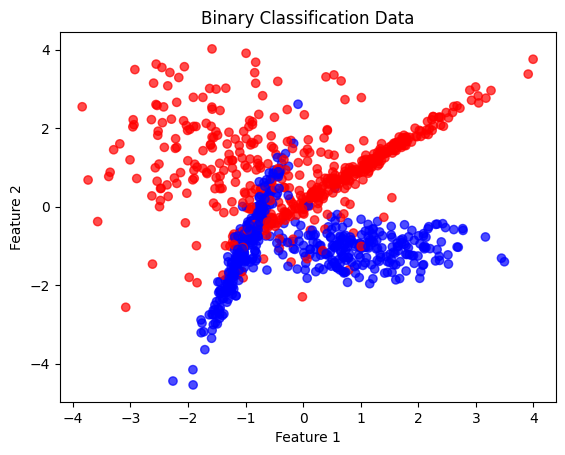

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Data')
plt.show()

### **4. Train Logistic Regression Model**

In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### **5. Make Predictions and Check Performance**

In [6]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.88
Confusion Matrix:
 [[89 12]
 [12 87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       101
           1       0.88      0.88      0.88        99

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



### **6. (Optional) Plot the Decision Boundary**

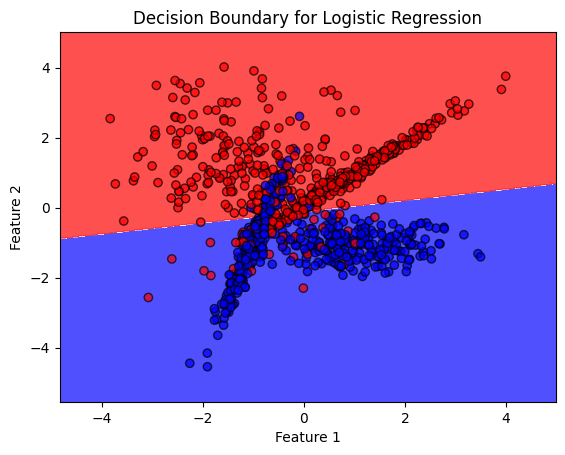

In [7]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='bwr', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary for Logistic Regression')
plt.show()


## 🧮 Mathematical Analysis of Logistic Regression

### Hypothesis Function

The hypothesis function for logistic regression is:

```
h_θ(x) = σ(θᵀx) = 1 / (1 + exp(-θᵀx))
```

where:
- `θ` is the vector of weights (parameters).
- `x` is the input feature vector.
- `σ(z)` is the sigmoid function.

---

### Decision Rule

The prediction `ŷ` is made using a threshold:

```
ŷ = { 1 if h_θ(x) ≥ 0.5
       0 if h_θ(x) < 0.5
```

---

### Cost Function (Log Loss / Cross-Entropy Loss)

The cost function for a single example is:

```
Cost(h_θ(x), y) = - [ y * log(h_θ(x)) + (1 - y) * log(1 - h_θ(x)) ]
```

The total cost function over all examples (average loss) is:

```
J(θ) = (1/m) * Σ [ - yᵢ * log(h_θ(xᵢ)) - (1 - yᵢ) * log(1 - h_θ(xᵢ)) ]
```

where:
- `m` is the number of training examples.
- `yᵢ` is the true label of example `i`.

---

### Gradient Descent Update Rule

To minimize the cost function, we compute the gradient of `J(θ)` with respect to `θ`:

```
∂J(θ) / ∂θ_j = (1/m) * Σ (h_θ(xᵢ) - yᵢ) * xᵢⱼ
```

The parameters are updated using gradient descent:

```
θ := θ - α * ∇J(θ)
```

where:
- `α` is the learning rate.
- `∇J(θ)` is the gradient vector.

---

### Intuition Behind the Gradient

- The term `(h_θ(xᵢ) - yᵢ)` represents the **error** between the predicted probability and the true label.
- Multiplying this error by `xᵢⱼ` adjusts the weights in proportion to the input feature's contribution.

---

### Convexity of the Cost Function

- The logistic regression cost function is **convex**.
- Convexity ensures that gradient descent will converge to the **global minimum**.

---

### Summary of Mathematical Formulation

| Term                    | Meaning                                |
|-------------------------|----------------------------------------|
| Hypothesis function     | `h_θ(x) = 1 / (1 + exp(-θᵀx))`         |
| Cost function           | Cross-entropy (log loss)               |
| Gradient                | `(1/m) * Σ (h_θ(xᵢ) - yᵢ) * xᵢⱼ`        |
| Optimization method     | Gradient Descent                       |
| Convexity               | Yes (guarantees global optimum)        |


## 🌟 Key Takeaways

| Concept                 | Explanation                                   |
|--------------------------|-----------------------------------------------|
| Purpose                  | Binary classification                       |
| Activation Function      | Sigmoid / Logistic function                  |
| Cost Function            | Cross-Entropy (Log Loss)                     |
| Optimization             | Gradient Descent to minimize the cost        |
| Decision Boundary        | Separates data into classes using threshold  |
| Output                   | Probability between 0 and 1                  |